In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
df = pd.read_csv("/content/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df = df.rename({"YearsExperience": "YE","Salary": "S"},axis = 1)
df

,YE,S
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<ipython-input-5-944bedc8d92d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='YE',y='S', data = df,palette = 'Set1')


<Axes: xlabel='YE', ylabel='S'>

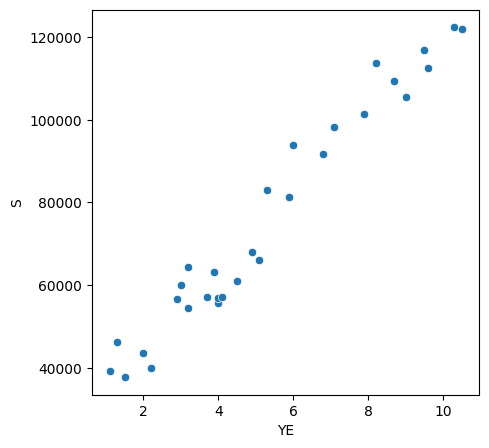

In [5]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='YE',y='S', data = df,palette = 'Set1')

In [6]:
DF = df.copy()

In [7]:
DF.corr()

,YE,S
YE,1.000000,0.978242
S,0.978242,1.000000


<ipython-input-8-4f2c5deebde8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["YE"])


<Axes: xlabel='YE', ylabel='Density'>

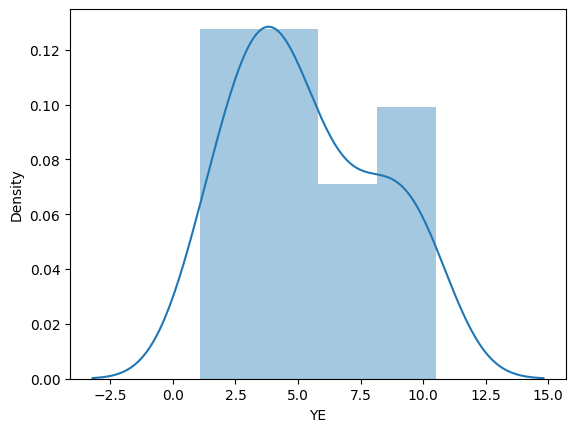

In [8]:
sns.distplot(df["YE"])

<ipython-input-9-b29d6a448150>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["S"])


<Axes: xlabel='S', ylabel='Density'>

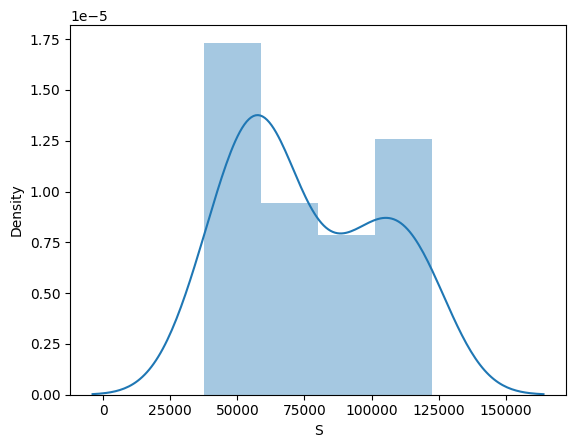

In [9]:
sns.distplot(df["S"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7efd14466df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efd14475370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efd14466c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7efd144758b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efd14475b50>],
 'means': []}

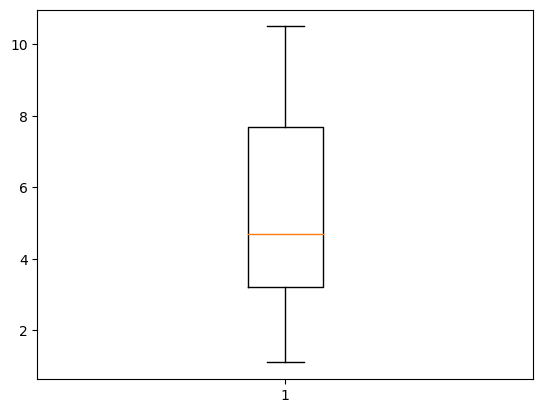

In [10]:
plt.boxplot(df["YE"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7efd143e3130>,
 'caps': [<matplotlib.lines.Line2D at 0x7efd143e3670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efd143d1e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7efd143e3bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efd143e3e50>],
 'means': []}

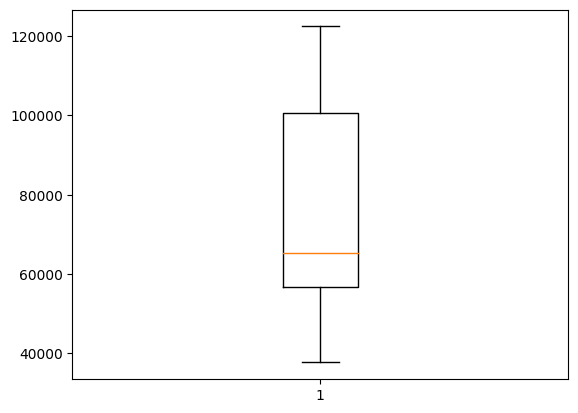

In [11]:
plt.boxplot(df["S"])

In [12]:
Model = smf.ols("YE~S", data=df).fit()

<Axes: xlabel='S', ylabel='YE'>

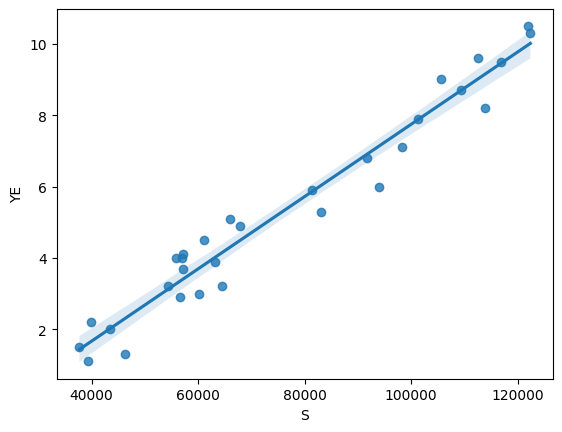

In [13]:
sns.regplot(x="S",y="YE",data=df)

In [14]:
Model.params

Intercept   -2.383161
S            0.000101
dtype: float64

In [15]:
Model.fittedvalues

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

In [16]:
Model.resid

0    -0.500934
1    -0.995819
2     0.062306
3    -0.024427
4     0.543572
5    -0.452729
6    -0.707969
7     0.069752
8    -0.942905
9     0.291879
10   -0.118652
11    0.733144
12    0.615372
13    0.702815
14    0.694715
15    0.403374
16    0.796690
17   -0.730801
18    0.043883
19   -1.129735
20   -0.106748
21   -0.468520
22    0.024747
23   -0.942087
24    0.001558
25    0.691330
26    0.038218
27    0.577103
28    0.289155
29    0.541712
dtype: float64

In [17]:
Model.rsquared

0.9569566641435086

In [18]:
Model.pvalues

Intercept    6.300123e-08
S            1.143068e-20
dtype: float64

In [19]:
df["Predicted Value"] = Model.fittedvalues
df

,YE,S,Predicted Value
0,1.1,39343.0,1.600934
1,1.3,46205.0,2.295819
2,1.5,37731.0,1.437694
3,2.0,43525.0,2.024427
4,2.2,39891.0,1.656428
5,2.9,56642.0,3.352729
6,3.0,60150.0,3.707969
7,3.2,54445.0,3.130248
8,3.2,64445.0,4.142905
9,3.7,57189.0,3.408121


In [20]:
Model.resid

0    -0.500934
1    -0.995819
2     0.062306
3    -0.024427
4     0.543572
5    -0.452729
6    -0.707969
7     0.069752
8    -0.942905
9     0.291879
10   -0.118652
11    0.733144
12    0.615372
13    0.702815
14    0.694715
15    0.403374
16    0.796690
17   -0.730801
18    0.043883
19   -1.129735
20   -0.106748
21   -0.468520
22    0.024747
23   -0.942087
24    0.001558
25    0.691330
26    0.038218
27    0.577103
28    0.289155
29    0.541712
dtype: float64

In [21]:
df["Error"] = Model.resid
Model.rsquared

0.9569566641435086

In [22]:
Model.pvalues

Intercept    6.300123e-08
S            1.143068e-20
dtype: float64

In [23]:
df["Error_Sq"] = (df["Error"])**2
df

,YE,S,Predicted Value,Error,Error_Sq
0,1.1,39343.0,1.600934,-0.500934,0.250935
1,1.3,46205.0,2.295819,-0.995819,0.991656
2,1.5,37731.0,1.437694,0.062306,0.003882
3,2.0,43525.0,2.024427,-0.024427,0.000597
4,2.2,39891.0,1.656428,0.543572,0.295471
5,2.9,56642.0,3.352729,-0.452729,0.204963
6,3.0,60150.0,3.707969,-0.707969,0.501220
7,3.2,54445.0,3.130248,0.069752,0.004865
8,3.2,64445.0,4.142905,-0.942905,0.889070
9,3.7,57189.0,3.408121,0.291879,0.085193


In [24]:
Mean_Squared_Error = df["Error_Sq"].mean()
Mean_Squared_Error

0.33509906527280836

In [25]:
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YE   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        07:41:52   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
S              0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
datalog = DF
datalog.head()

,YE,S
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [28]:
datalog=np.log(DF)
datalog.head()

,YE,S
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


<ipython-input-29-52ff570e28c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datalog['S'])


<Axes: xlabel='S', ylabel='Density'>

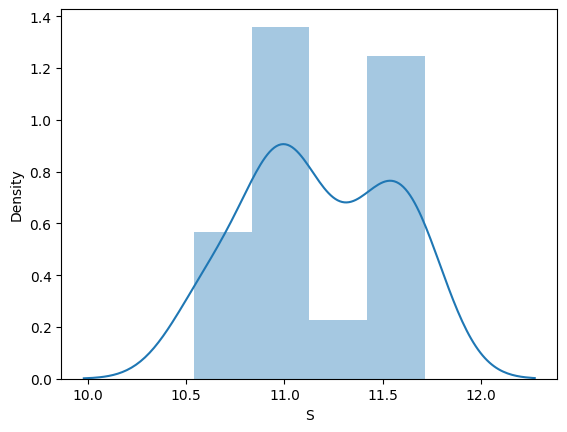

In [29]:
sns.distplot(datalog['S'])


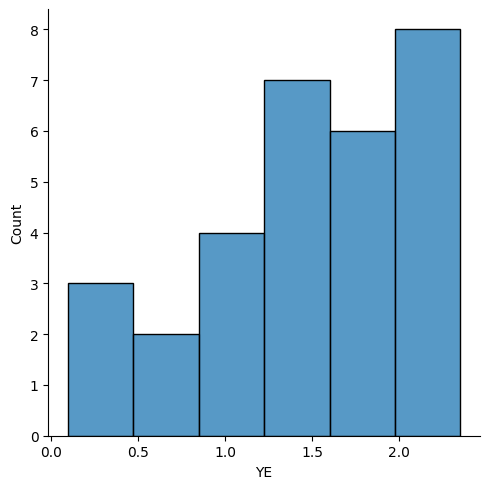

In [30]:
sns.displot(datalog['YE'])

In [31]:
datalog.corr()

,YE,S
YE,1.000000,0.951428
S,0.951428,1.000000


<Axes: xlabel='S', ylabel='YE'>

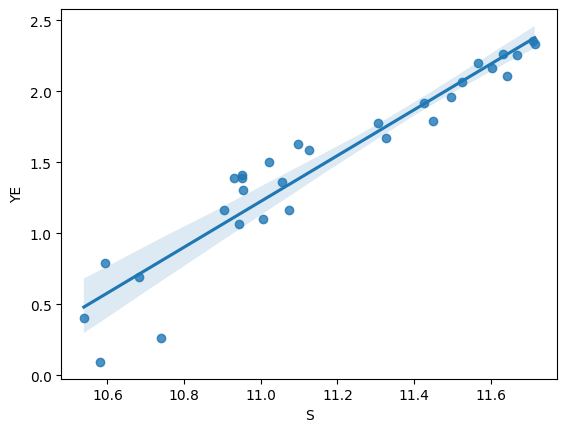

In [32]:
Model2=smf.ols("YE~S", data=datalog).fit()
sns.regplot(x='S',y='YE',data = datalog)

In [33]:
Model2.pvalues

Intercept    6.781355e-15
S            7.395278e-16
dtype: float64

In [34]:
Model2.params

Intercept   -16.490132
S             1.610448
dtype: float64

In [35]:
Model2.rsquared

0.9052150725817153

In [36]:
Model2.fittedvalues

0     0.548531
1     0.807443
2     0.481156
3     0.711214
4     0.570808
5     1.135431
6     1.232204
7     1.071722
8     1.343278
9     1.150909
10    1.312320
11    1.111138
12    1.144362
13    1.147864
14    1.257730
15    1.428283
16    1.382382
17    1.752473
18    1.718687
19    1.950166
20    1.911966
21    2.022786
22    2.071674
23    2.259197
24    2.195981
25    2.138317
26    2.303261
27    2.242456
28    2.376233
29    2.369390
dtype: float64

In [37]:
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YE   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           7.40e-16
Time:                        08:26:01   Log-Likelihood:                 7.4195
No. Observations:                  30   AIC:                            -10.84
Df Residuals:                      28   BIC:                            -8.037
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.4901      1.101    -14.977      0.000     -18.745     -14.235
S              1.6104      0.098     16.353      0.000       1.409       1.812
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.142
Skew:                          -0.840   Prob(JB):                       0.0765
Kurtosis:                       4.136   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
datalog['Predicted Value']=Model.fittedvalues
datalog['Error']=Model.resid
datalog

,YE,S,Predicted Value,Error
0,0.095310,10.580073,1.600934,-0.500934
1,0.262364,10.740843,2.295819,-0.995819
2,0.405465,10.538237,1.437694,0.062306
3,0.693147,10.681091,2.024427,-0.024427
4,0.788457,10.593906,1.656428,0.543572
5,1.064711,10.944506,3.352729,-0.452729
6,1.098612,11.004597,3.707969,-0.707969
7,1.163151,10.904946,3.130248,0.069752
8,1.163151,11.073567,4.142905,-0.942905
9,1.308333,10.954117,3.408121,0.291879


In [40]:
datalog['Error_Sq']=(datalog['Error'])**2
datalog

,YE,S,Predicted Value,Error,Error_Sq
0,0.095310,10.580073,1.600934,-0.500934,0.250935
1,0.262364,10.740843,2.295819,-0.995819,0.991656
2,0.405465,10.538237,1.437694,0.062306,0.003882
3,0.693147,10.681091,2.024427,-0.024427,0.000597
4,0.788457,10.593906,1.656428,0.543572,0.295471
5,1.064711,10.944506,3.352729,-0.452729,0.204963
6,1.098612,11.004597,3.707969,-0.707969,0.501220
7,1.163151,10.904946,3.130248,0.069752,0.004865
8,1.163151,11.073567,4.142905,-0.942905,0.889070
9,1.308333,10.954117,3.408121,0.291879,0.085193


In [41]:
Mean_Squared_Error=datalog['Error_Sq'].mean()
Mean_Squared_Error

0.33509906527280836

In [42]:
#data square = DS
DS=DF
DS.head()

,YE,S
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<ipython-input-43-c2be4c0caa50>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DS['YE'])


<Axes: xlabel='YE', ylabel='Density'>

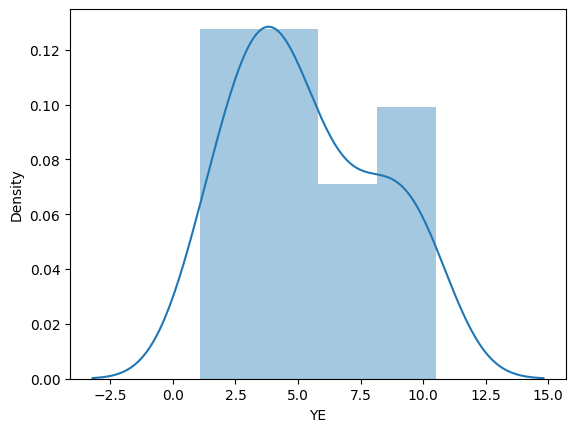

In [43]:
sns.distplot(DS['YE'])


<ipython-input-44-8d55c2cd479e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DS['S'])


<Axes: xlabel='S', ylabel='Density'>

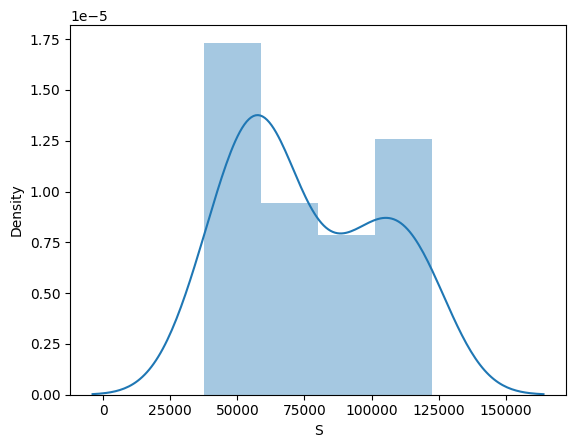

In [44]:
sns.distplot(DS['S'])

In [46]:
DS.corr()

,YE,S
YE,1.000000,0.978242
S,0.978242,1.000000


<Axes: xlabel='S', ylabel='YE'>

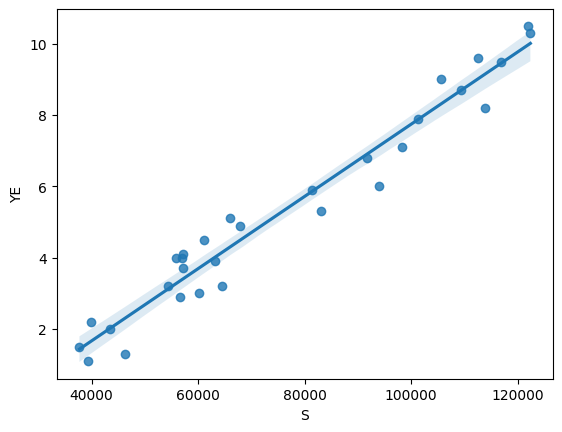

In [47]:
Model3=smf.ols('YE~S',data=DS).fit()
sns.regplot(x="S",y="YE",data=DS)

In [49]:
Model3.rsquared

0.9569566641435086

In [50]:
Model3.pvalues

Intercept    6.300123e-08
S            1.143068e-20
dtype: float64

In [51]:
Model3.params

Intercept   -2.383161
S            0.000101
dtype: float64

In [53]:
Model3.fittedvalues

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

In [54]:
Model3.resid

0    -0.500934
1    -0.995819
2     0.062306
3    -0.024427
4     0.543572
5    -0.452729
6    -0.707969
7     0.069752
8    -0.942905
9     0.291879
10   -0.118652
11    0.733144
12    0.615372
13    0.702815
14    0.694715
15    0.403374
16    0.796690
17   -0.730801
18    0.043883
19   -1.129735
20   -0.106748
21   -0.468520
22    0.024747
23   -0.942087
24    0.001558
25    0.691330
26    0.038218
27    0.577103
28    0.289155
29    0.541712
dtype: float64

In [56]:
DS['Predicted Value']=Model3.fittedvalues
DS['Error']=Model.resid
DS

,YE,S,Predicted Value,Error
0,1.1,39343.0,1.600934,-0.500934
1,1.3,46205.0,2.295819,-0.995819
2,1.5,37731.0,1.437694,0.062306
3,2.0,43525.0,2.024427,-0.024427
4,2.2,39891.0,1.656428,0.543572
5,2.9,56642.0,3.352729,-0.452729
6,3.0,60150.0,3.707969,-0.707969
7,3.2,54445.0,3.130248,0.069752
8,3.2,64445.0,4.142905,-0.942905
9,3.7,57189.0,3.408121,0.291879


In [57]:
DS['Error_Sq']=(DS['Error'])**2
DS

,YE,S,Predicted Value,Error,Error_Sq
0,1.1,39343.0,1.600934,-0.500934,0.250935
1,1.3,46205.0,2.295819,-0.995819,0.991656
2,1.5,37731.0,1.437694,0.062306,0.003882
3,2.0,43525.0,2.024427,-0.024427,0.000597
4,2.2,39891.0,1.656428,0.543572,0.295471
5,2.9,56642.0,3.352729,-0.452729,0.204963
6,3.0,60150.0,3.707969,-0.707969,0.501220
7,3.2,54445.0,3.130248,0.069752,0.004865
8,3.2,64445.0,4.142905,-0.942905,0.889070
9,3.7,57189.0,3.408121,0.291879,0.085193


In [58]:
Mean_Squared_Error=DS['Error_Sq'].mean()
Mean_Squared_Error

0.33509906527280836

In [60]:
Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YE   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        09:55:13   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
S              0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""